In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA

In [2]:
df=pd.read_csv('/content/all_stocks_1yr.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Volume,Name
0,2016-08-12,181.47,181.47,179.90,180.27,1232856,MMM
1,2016-08-15,181.00,181.39,180.46,180.56,1268247,MMM
2,2016-08-16,180.12,180.33,179.21,179.25,1363554,MMM
3,2016-08-17,178.67,180.09,178.32,179.87,1358528,MMM
4,2016-08-18,179.70,179.70,178.58,179.18,1088677,MMM


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126217 entries, 0 to 126216
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Date    126217 non-null  object 
 1   Open    125837 non-null  float64
 2   High    126011 non-null  float64
 3   Low     125993 non-null  float64
 4   Close   126217 non-null  float64
 5   Volume  126217 non-null  int64  
 6   Name    126217 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 6.7+ MB


In [5]:
df['Date']=pd.to_datetime(df['Date'])

In [6]:
df.set_index(['Date'],inplace=True)
df

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2016-08-12,181.47,181.47,179.90,180.27,1232856,MMM
2016-08-15,181.00,181.39,180.46,180.56,1268247,MMM
2016-08-16,180.12,180.33,179.21,179.25,1363554,MMM
2016-08-17,178.67,180.09,178.32,179.87,1358528,MMM
2016-08-18,179.70,179.70,178.58,179.18,1088677,MMM
...,...,...,...,...,...,...
2017-08-07,62.12,62.34,61.25,61.83,4208287,ZTS
2017-08-08,60.49,61.00,59.50,60.00,4663668,ZTS
2017-08-09,59.95,60.87,59.76,60.81,4017297,ZTS


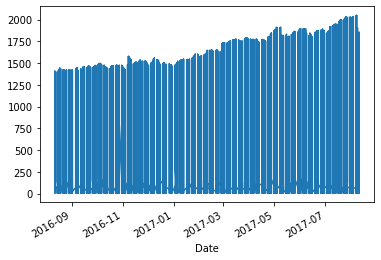

In [7]:
df['Close'].plot()

In [8]:
mmm=df[df['Name']=='MMM']
mmm

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2016-08-12,181.47,181.47,179.90,180.27,1232856,MMM
2016-08-15,181.00,181.39,180.46,180.56,1268247,MMM
2016-08-16,180.12,180.33,179.21,179.25,1363554,MMM
2016-08-17,178.67,180.09,178.32,179.87,1358528,MMM
2016-08-18,179.70,179.70,178.58,179.18,1088677,MMM
...,...,...,...,...,...,...
2017-08-07,207.90,208.40,206.68,207.44,1172563,MMM
2017-08-08,206.83,207.89,205.69,206.43,1856282,MMM
2017-08-09,206.69,207.91,205.59,206.48,1622213,MMM


Open      1
High      0
Low       1
Close     0
Volume    0
Name      0
dtype: int64

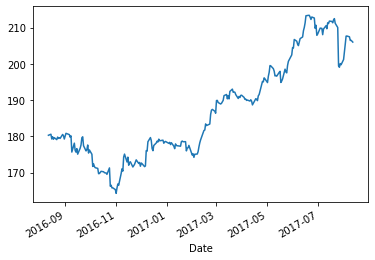

In [9]:
mmm['Close'].plot()
mmm.isnull().sum()

In [10]:
from statsmodels.tsa.stattools import adfuller

In [11]:
adftest=adfuller(mmm['Close'])
adftest[1]

0.9248414180891573

In [12]:
mmm['NClose']=mmm['Close']-mmm['Close'].shift(1)

<ipython-input-12-0b294548d467>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mmm['NClose']=mmm['Close']-mmm['Close'].shift(1)


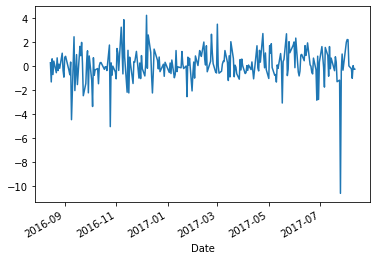

In [13]:
mmm['NClose'].plot()

In [14]:
adftest=adfuller(mmm['NClose'].dropna())
adftest[1]

6.061814433717772e-12

In [15]:
mmm['NClose']

Date
2016-08-12     NaN
2016-08-15    0.29
2016-08-16   -1.31
2016-08-17    0.62
2016-08-18   -0.69
              ... 
2017-08-07   -0.21
2017-08-08   -1.01
2017-08-09    0.05
2017-08-10   -0.25
2017-08-11   -0.25
Name: NClose, Length: 252, dtype: float64

In [16]:
#pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
from sklearn.model_selection import train_test_split

In [21]:
mmm.reset_index(inplace=True)
X=mmm['Date']
y=mmm['Close']
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.33)

In [24]:
X_train,y_train

(210   2017-06-14
 232   2017-07-17
 123   2017-02-08
 51    2016-10-25
 186   2017-05-10
          ...    
 124   2017-02-09
 147   2017-03-15
 0     2016-08-12
 183   2017-05-05
 69    2016-11-18
 Name: Date, Length: 168, dtype: datetime64[ns], 210    210.01
 232    211.68
 123    177.07
 51     166.23
 186    196.64
         ...  
 124    178.18
 147    191.20
 0      180.27
 183    199.40
 69     172.96
 Name: Close, Length: 168, dtype: float64)

In [23]:
from pmdarima.arima import auto_arima

# Define the range of p, d, and q values to search
#p_values = range(0, 8)d_values = range(0, 3)q_values = range(0, 8)

# Define the data
#data = mmm['NClose'].dropna()

# Initialize the best AIC value and the best parameters
#best_aic = float('inf')
#best_params = (0,0,0)

# Loop through the p, d, and q values
#for p in p_values:
    #for d in d_values:
        #for q in q_values:
            #try:
                # Fit the ARIMA model
                #model = auto_arima(data, start_p=p, start_q=q, max_p=p, max_q=q,
                                   #start_P=d, max_P=d, m=12,
                                   #seasonal=True, trace=False,
                                   #error_action='ignore',  # don't want to know if an order does not work
                                   #suppress_warnings=True,  # don't want convergence warnings
                                   #stepwise=True)  # set to stepwise

                 #Update the best AIC and parameters if the current AIC is lower
                #if model.aic < best_aic:
                    #best_aic = model.aic
                    #best_params = (p,d,q)
            #except:
                #continue

# Print the best parameters
#print(f'The best parameters are: p = {best_params[0]}, d = {best_params[1]}, q = {best_params[2]}')


The best parameters are: p = 0, d = 0, q = 0


In [29]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(mmm['Close'],order=(0,1,0))
result=model.fit()

In [32]:
prediction=result.predict(200,len(mmm['Close']))
len(prediction)

53

In [34]:
prediction

200    202.44
201    204.47
202    204.35
203    206.70
204    206.22
205    205.41
206    205.01
207    205.94
208    206.93
209    207.39
210    209.11
211    210.01
212    211.29
213    213.24
214    213.36
215    213.36
216    212.86
217    212.22
218    212.90
219    212.61
220    209.78
221    210.62
222    207.85
223    208.19
224    209.83
225    209.76
226    208.02
227    209.59
228    210.49
229    209.66
230    211.30
231    211.09
232    211.77
233    211.68
234    211.31
235    212.10
236    212.45
237    211.16
238    210.00
239    199.39
240    199.03
241    200.05
242    199.72
243    201.17
244    203.18
245    205.41
246    207.62
247    207.65
248    207.44
249    206.43
250    206.48
251    206.23
252    205.98
Name: predicted_mean, dtype: float64

In [41]:
mmm['Forecast']=prediction
mmm['Forecast']

<ipython-input-41-5fcf617ead2d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mmm['Forecast']=prediction


0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
        ...  
247    207.65
248    207.44
249    206.43
250    206.48
251    206.23
Name: Forecast, Length: 252, dtype: float64

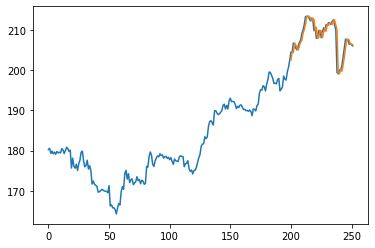

In [42]:
plt.plot(mmm[['Close','Forecast']])

In [43]:
mmm

,Date,Open,High,Low,Close,Volume,Name,NClose,Forecast
0,2016-08-12,181.47,181.47,179.90,180.27,1232856,MMM,NaN,NaN
1,2016-08-15,181.00,181.39,180.46,180.56,1268247,MMM,0.29,NaN
2,2016-08-16,180.12,180.33,179.21,179.25,1363554,MMM,-1.31,NaN
3,2016-08-17,178.67,180.09,178.32,179.87,1358528,MMM,0.62,NaN
4,2016-08-18,179.70,179.70,178.58,179.18,1088677,MMM,-0.69,NaN
...,...,...,...,...,...,...,...,...,...
247,2017-08-07,207.90,208.40,206.68,207.44,1172563,MMM,-0.21,207.65
248,2017-08-08,206.83,207.89,205.69,206.43,1856282,MMM,-1.01,207.44
249,2017-08-09,206.69,207.91,205.59,206.48,1622213,MMM,0.05,206.43
250,2017-08-10,205.62,207.16,205.18,206.23,1571545,MMM,-0.25,206.48


/usr/local/lib/python3.8/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


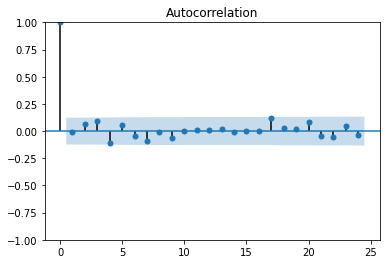

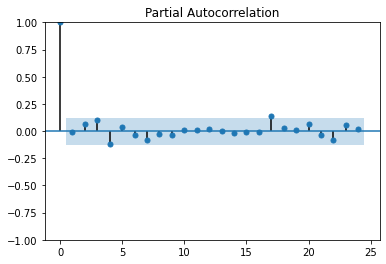

In [46]:
plot_acf(mmm['NClose'].dropna());
plot_pacf(mmm['NClose'].dropna());

In [51]:
from statsmodels.tsa.arima.model import ARIMA

In [53]:
arima_mo=ARIMA(mmm['Close'],order=(0,1,0))
arima_result=model.fit()

In [56]:
arima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  252
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -445.095
Date:                Mon, 16 Jan 2023   AIC                            892.189
Time:                        05:15:26   BIC                            895.715
Sample:                             0   HQIC                           893.608
                                - 252                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         2.0313      0.068     29.853      0.000       1.898       2.165
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              1864.74
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               1.28   Skew:                            -1.81
Prob(H) (two-sided):                  0.26   Kurtosis:                        15.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [67]:
arima_result.predict(220,252)-mmm['Close'].iloc[220:]

220    -0.84
221     2.77
222    -0.34
223    -1.64
224     0.07
225     1.74
226    -1.57
227    -0.90
228     0.83
229    -1.64
230     0.21
231    -0.68
232     0.09
233     0.37
234    -0.79
235    -0.35
236     1.29
237     1.16
238    10.61
239     0.36
240    -1.02
241     0.33
242    -1.45
243    -2.01
244    -2.23
245    -2.21
246    -0.03
247     0.21
248     1.01
249    -0.05
250     0.25
251     0.25
252      NaN
dtype: float64

In [68]:
adftest=adfuller(mmm['High'])
adftest[1]

0.8914055810746027

In [70]:
mmm['NHigh']=mmm['High']-mmm['High'].shift(1)

<ipython-input-70-c4383c2e1643>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mmm['NHigh']=mmm['High']-mmm['High'].shift(1)


In [72]:
adftest=adfuller(mmm['NHigh'].dropna())
adftest[1]

3.708814902766073e-15

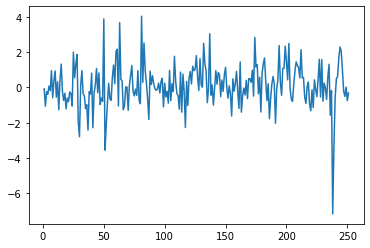

In [73]:
mmm['NHigh'].plot()

/usr/local/lib/python3.8/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


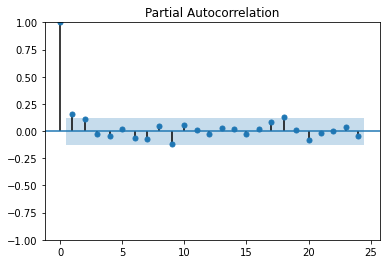

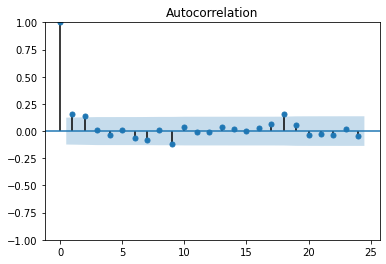

In [74]:
plot_pacf(mmm['NHigh'].dropna());
plot_acf(mmm['NHigh'].dropna());

In [147]:
model=ARIMA(mmm['High'],order=(3,1,3))
result=model.fit()

/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [148]:
phigh=result.predict(180,252)
phigh-mmm['High'].iloc[179:]

179         NaN
180   -0.632666
181   -1.428596
182   -1.596114
183    0.425152
         ...   
248    0.710004
249   -0.394466
250    0.973554
251    0.154067
252         NaN
Length: 74, dtype: float64

In [149]:
len(mmm['High'].iloc[179:]),len(phigh)

(73, 73)

In [150]:
mmm['PrediHigh'].iloc[179:]=phigh

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [151]:
mmm[['High','PrediHigh']].iloc[179:]

,High,PrediHigh
179,195.73,195.897334
180,196.53,196.441404
181,197.87,197.943886
182,199.54,200.325152
183,199.90,199.767032
...,...,...
247,208.40,208.600004
248,207.89,207.515534
249,207.91,208.133554
250,207.16,207.004067


In [152]:
from sklearn import metrics

In [153]:
metrics.mean_squared_error(mmm['High'].tail(73),mmm['PrediHigh'].tail(73)),metrics.mean_absolute_error(mmm['High'].tail(73),mmm['PrediHigh'].tail(73))

(0.12291451881915391, 0.26185614636361965)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


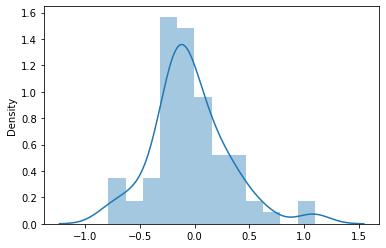

In [154]:
sns.distplot(mmm['High'].tail(73)-mmm['PrediHigh'].tail(73))

In [155]:
metrics.explained_variance_score(mmm['High'].tail(33),mmm['PrediHigh'].tail(33))

0.9899571174852022

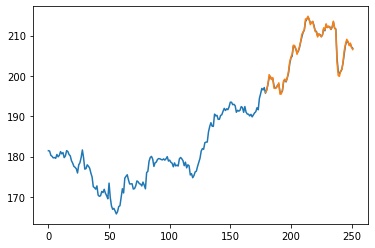

In [156]:
plt.plot(mmm[['High','PrediHigh']])